In [ ]:
##############################################
# Programmer Name: Austin Diamond
# Class: CIS4321
# Classification Trees
# Date:  4/12/2023
##############################################

In this assignment you will be using `apple.csv` dataset contains 31 stock buying attribute. The target variable is called `buy` and its a binary label [0,1]. Using this dataset perform the following tasks:

### 1. Load the data into dataframe named stocks. Display the first 5 rows. and DataFrame .info.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
files.upload();

Saving apple.csv to apple (4).csv


In [ ]:
stocks = pd.read_csv("apple.csv")

In [ ]:
stocks.head()

,close,volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,EMA_200,macd,signal,...,SMI,signal.1,MAD,WPR,CCI,adx,Typical_Price,Money_Flow_Ratio,Money_Flow_Index,buy
0,71.587143,62775300,69.999999,69.411000,65.090886,70.289662,68.489636,65.090886,0.659108,0.410707,...,72.101321,46.236036,0.312927,-5.049808,177.167259,11.001774,71.565239,-1.971054,202.980907,0
1,72.071426,63398300,70.301285,69.523914,65.059079,70.613619,68.630098,65.160344,0.765274,0.481620,...,81.555665,52.657787,0.393833,-0.921986,178.801871,11.236451,71.855237,-2.601405,162.445183,0
2,72.698570,72635500,70.670713,69.660714,65.035357,70.992701,68.789646,65.235351,0.889760,0.563248,...,88.071793,59.096697,0.519464,-1.194316,207.607161,11.895970,72.564761,-3.716264,136.815271,0
3,74.480003,99526700,71.150856,69.851885,65.031329,71.626756,69.012798,65.327338,1.119260,0.674451,...,89.127337,64.556813,0.672199,-6.388509,241.694698,13.683376,74.151431,-3.799027,135.726706,0
4,74.267143,133515900,71.706999,70.001914,65.028450,72.106826,69.218850,65.416291,1.269333,0.793427,...,81.756849,67.684093,0.834720,-17.101872,184.454606,15.604012,74.111905,-2.092062,191.569876,0


In [ ]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   close             784 non-null    float64
 1   volume            784 non-null    int64  
 2   SMA_10            784 non-null    float64
 3   SMA_50            784 non-null    float64
 4   SMA_200           784 non-null    float64
 5   EMA_10            784 non-null    float64
 6   EMA_50            784 non-null    float64
 7   EMA_200           784 non-null    float64
 8   macd              784 non-null    float64
 9   signal            784 non-null    float64
 10  divergence        784 non-null    float64
 11  PPO               784 non-null    float64
 12  RSI               784 non-null    float64
 13  dn                784 non-null    float64
 14  mavg              784 non-null    float64
 15  up                784 non-null    float64
 16  pctB              784 non-null    float64
 1

### 2. Partition the data into `X` selecting all columns except the target variable. and `y` for target variable.

In [ ]:
# Define X and Y
X = stocks.drop(["buy"], axis=1)

In [ ]:
y = stocks.buy

### 2. Split the dataset into train and test dataset


In [ ]:
# partition the data into training and testing sets
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
len(X_train), len(X_test)

(548, 236)

### 3. Construct a decision tree with the default parameters.


In [ ]:
# import DT Classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# instantiate DT model
dtree = DecisionTreeClassifier()

In [ ]:
# Fit DT
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
X.columns

Index(['close', 'volume', 'SMA_10', 'SMA_50', 'SMA_200', 'EMA_10', 'EMA_50',
       'EMA_200', 'macd', 'signal', 'divergence', 'PPO', 'RSI', 'dn', 'mavg',
       'up', 'pctB', 'fastK', 'fastD', 'slowD', 'KDJ', 'SMI', 'signal.1',
       'MAD', 'WPR', 'CCI', 'adx', 'Typical_Price', 'Money_Flow_Ratio',
       'Money_Flow_Index'],
      dtype='object')

[Text(0.6189320388349514, 0.9642857142857143, 'pctB <= 0.879\ngini = 0.498\nsamples = 548\nvalue = [257, 291]'),
 Text(0.3932038834951456, 0.8928571428571429, 'KDJ <= 0.959\ngini = 0.386\nsamples = 375\nvalue = [98, 277]'),
 Text(0.20388349514563106, 0.8214285714285714, 'KDJ <= 0.736\ngini = 0.271\nsamples = 315\nvalue = [51, 264]'),
 Text(0.05825242718446602, 0.75, 'close <= 73.659\ngini = 0.13\nsamples = 214\nvalue = [15, 199]'),
 Text(0.038834951456310676, 0.6785714285714286, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.07766990291262135, 0.6785714285714286, 'signal <= -3.09\ngini = 0.107\nsamples = 211\nvalue = [12, 199]'),
 Text(0.038834951456310676, 0.6071428571428571, 'MAD <= 0.521\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.019417475728155338, 0.5357142857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.05825242718446602, 0.5357142857142857, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.11650485436893204, 0.6071428571428571, 'CCI <= 140.591\ngi

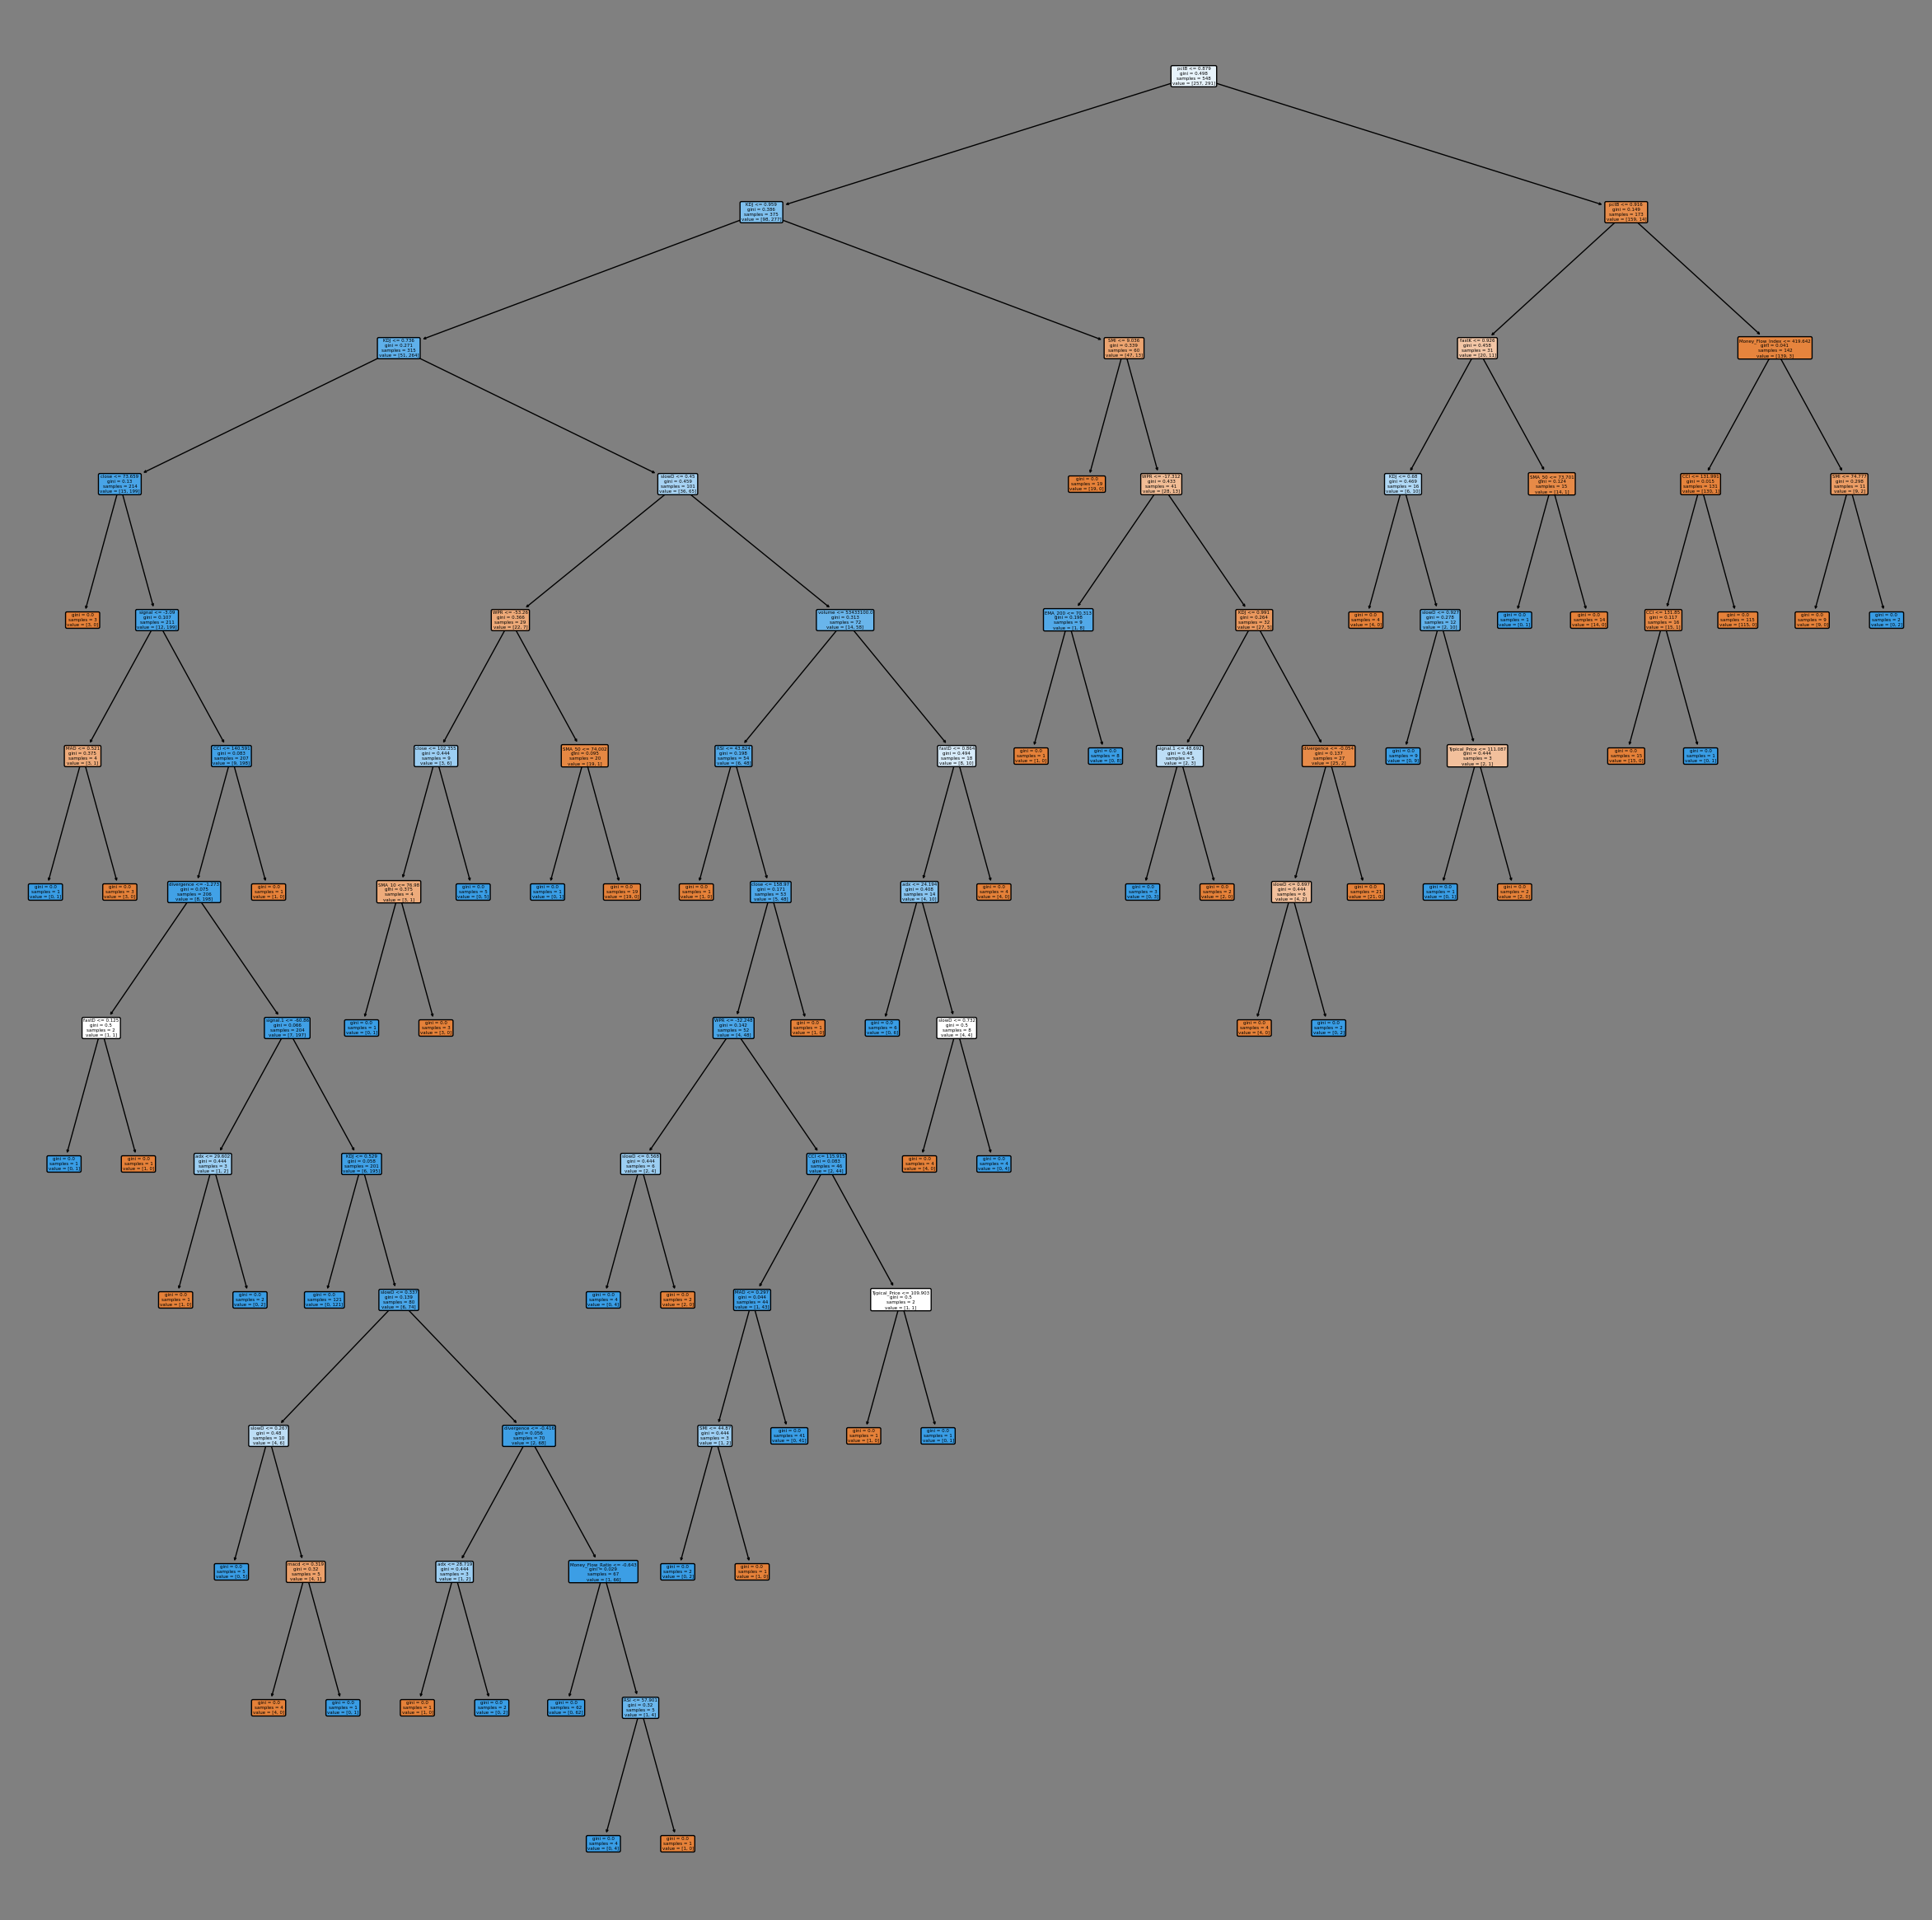

In [ ]:
# Visualize the tree using tree.plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
fig, ax = plt.subplots(figsize=(30,30), facecolor="gray")
tree.plot_tree(dtree, feature_names=X.columns, filled=True, rounded=True)

### 4. Report confusion matrix and performance parameters


In [ ]:
stocks.buy.value_counts()

1    426
0    358
Name: buy, dtype: int64

In [ ]:
y_pred_dt = dtree.fit(X_train, y_train).predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# confusion matrix
confusion_matrix(y_test, y_pred_dt)

array([[ 86,  15],
       [ 30, 105]])

In [ ]:
# generate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt, target_names = ["buy: 0", "buy: 1"]))

              precision    recall  f1-score   support

      buy: 0       0.74      0.85      0.79       101
      buy: 1       0.88      0.78      0.82       135

    accuracy                           0.81       236
   macro avg       0.81      0.81      0.81       236
weighted avg       0.82      0.81      0.81       236



### 5. Construct ROC curve and report AUC value.


In [ ]:
# plot roc curve
from sklearn.metrics import RocCurveDisplay

Text(0.5, 1.0, ' ROC Curve ')

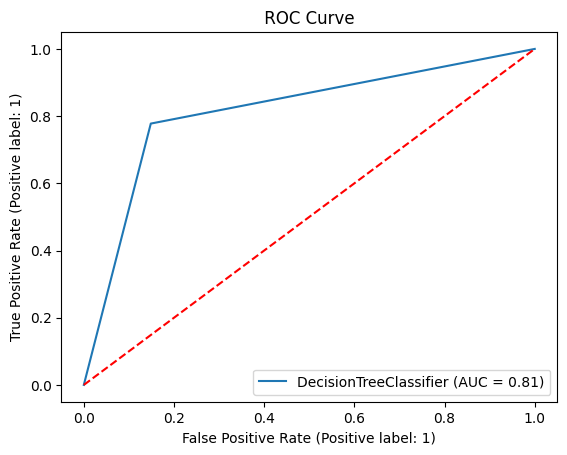

In [ ]:
import matplotlib.pyplot as plt

dt_disp = RocCurveDisplay.from_estimator(dtree, X_test, y_test)

plt.plot([0,1], [0,1], color = 'r', linestyle = '--')
plt.title(' ROC Curve ')

### 6. Fine tune Decision Tree parameter using GridSearch. Similar to lecture settings.


In [ ]:
# pruning
dtree_ccp = dtree.cost_complexity_pruning_path(X_train, y_train)

In [ ]:
dtree_ccp

{'ccp_alphas': array([0.        , 0.00174548, 0.00177268, 0.00181089, 0.00182482,
        0.00243309, 0.00243309, 0.00273723, 0.00273723, 0.00278576,
        0.00304136, 0.0031207 , 0.00324412, 0.00335538, 0.00340633,
        0.00346715, 0.00354791, 0.00364964, 0.00456204, 0.00456204,
        0.00521376, 0.00563376, 0.00674507, 0.00714905, 0.00760341,
        0.0086144 , 0.00880818, 0.00960242, 0.01034182, 0.02227397,
        0.07103337, 0.18692059]),
 'impurities': array([0.        , 0.00698191, 0.01407263, 0.01769441, 0.01951922,
        0.02195231, 0.0243854 , 0.02712263, 0.02985986, 0.04657444,
        0.05569853, 0.06818134, 0.07142546, 0.07478084, 0.07818717,
        0.08165432, 0.08875014, 0.09239977, 0.09696182, 0.10152386,
        0.11195139, 0.12321891, 0.14345411, 0.15060316, 0.15820657,
        0.16682097, 0.17562914, 0.18523156, 0.19557338, 0.24012132,
        0.31115469, 0.49807528])}

In [ ]:
ccp_alphas, impurities = dtree_ccp.ccp_alphas, dtree_ccp.impurities

Text(0.5, 1.0, 'Total Impurity vs Effective Alpha for training set')

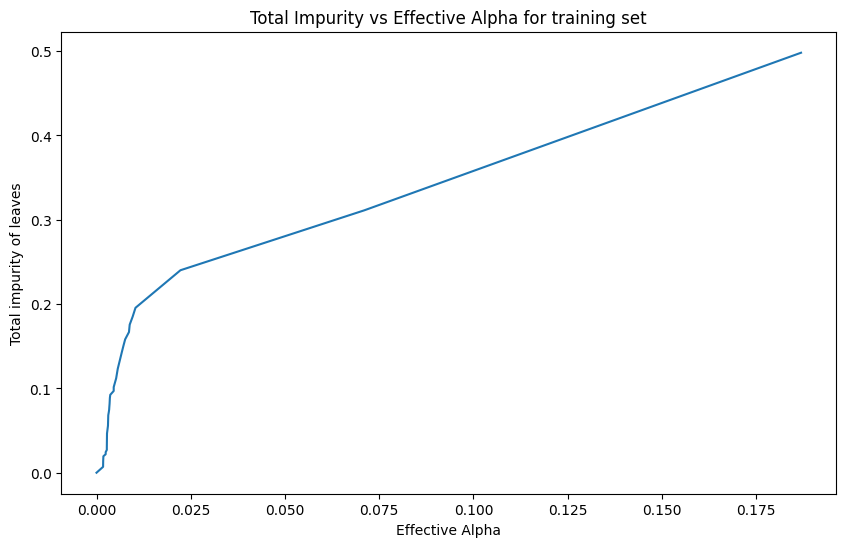

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Effective Alpha")
plt.ylabel("Total impurity of leaves")
plt.title("Total Impurity vs Effective Alpha for training set")

In [ ]:
param_grid = {"ccp_alpha": ccp_alphas,
              "max_depth": range(1,11),
              "min_samples_leaf": range(1,11),
              "criterion": ["gini", "entropy"]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
search = GridSearchCV(dtree,
                      param_grid,
                      cv=10,
                      scoring="roc_auc")

In [ ]:
search_fit = search.fit(X_train, y_train)

Text(0.5, 1.0, ' ROC Curve ')

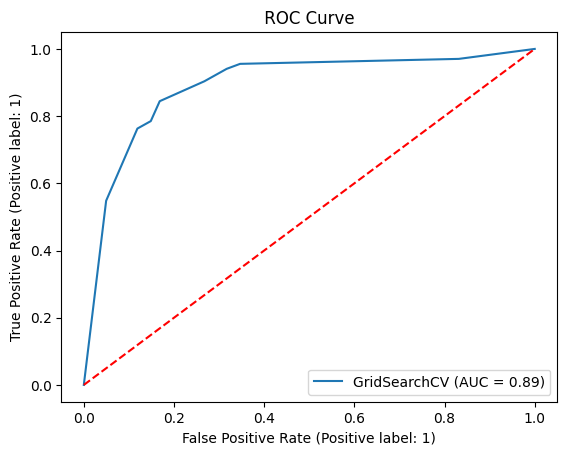

In [ ]:
dt_disp = RocCurveDisplay.from_estimator(search_fit, X_test, y_test)

plt.plot([0,1], [0,1], color = 'r', linestyle = '--')
plt.title(' ROC Curve ')

### 7. Show optimal parameters and performance metric post tuning step.


In [ ]:
pd.DataFrame(search_fit.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006394,0.001249,0.004691,0.000912,0.0,gini,1,1,"{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_d...",0.686667,...,0.788462,0.788462,0.738727,0.79244,0.725464,0.725517,0.788276,0.752274,0.034295,5991
1,0.005939,0.001222,0.004325,0.000378,0.0,gini,1,2,"{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_d...",0.686667,...,0.788462,0.788462,0.738727,0.79244,0.725464,0.725517,0.788276,0.752274,0.034295,5991
2,0.006002,0.001222,0.004916,0.001482,0.0,gini,1,3,"{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_d...",0.686667,...,0.788462,0.788462,0.738727,0.79244,0.725464,0.725517,0.788276,0.752274,0.034295,5991
3,0.006364,0.001113,0.005546,0.001624,0.0,gini,1,4,"{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_d...",0.686667,...,0.788462,0.788462,0.738727,0.79244,0.725464,0.725517,0.788276,0.752274,0.034295,5991
4,0.006358,0.001821,0.004745,0.001356,0.0,gini,1,5,"{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_d...",0.686667,...,0.788462,0.788462,0.738727,0.79244,0.725464,0.725517,0.788276,0.752274,0.034295,5991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,0.012288,0.000512,0.003207,0.000090,0.186921,entropy,10,6,"{'ccp_alpha': 0.18692059263055305, 'criterion'...",0.663333,...,0.788462,0.750000,0.732759,0.79244,0.846154,0.720000,0.788276,0.756617,0.047500,5581
6396,0.012204,0.000514,0.003395,0.000236,0.186921,entropy,10,7,"{'ccp_alpha': 0.18692059263055305, 'criterion'...",0.663333,...,0.788462,0.750000,0.732759,0.79244,0.846154,0.720000,0.788276,0.756617,0.047500,5581
6397,0.012841,0.001129,0.003529,0.000574,0.186921,entropy,10,8,"{'ccp_alpha': 0.18692059263055305, 'criterion'...",0.663333,...,0.788462,0.750000,0.732759,0.79244,0.846154,0.720000,0.788276,0.756617,0.047500,5581
6398,0.012136,0.000758,0.003367,0.000139,0.186921,entropy,10,9,"{'ccp_alpha': 0.18692059263055305, 'criterion'...",0.663333,...,0.788462,0.750000,0.732759,0.79244,0.846154,0.720000,0.788276,0.756617,0.047500,5581


In [ ]:
pd.DataFrame(search_fit.cv_results_). sort_values("rank_test_score")[["param_ccp_alpha", "param_criterion", "param_max_depth", "param_min_samples_leaf"]]

,param_ccp_alpha,param_criterion,param_max_depth,param_min_samples_leaf
3439,0.00365,gini,4,10
3437,0.00365,gini,4,8
3438,0.00365,gini,4,9
39,0.0,gini,4,10
37,0.0,gini,4,8
...,...,...,...,...
6269,0.186921,gini,7,10
6270,0.186921,gini,8,1
6271,0.186921,gini,8,2
6273,0.186921,gini,8,4


In [ ]:
search_fit.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0036496350364963507, max_depth=4,
                       min_samples_leaf=10)

In [ ]:
y_pred = search_fit.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred, target_names = ["buy: 0", "buy: 1"]))

              precision    recall  f1-score   support

      buy: 0       0.80      0.83      0.82       101
      buy: 1       0.87      0.84      0.86       135

    accuracy                           0.84       236
   macro avg       0.84      0.84      0.84       236
weighted avg       0.84      0.84      0.84       236



### 8. Show the top 5 most importance features


In [ ]:
search_fit.best_estimator_.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02310653, 0.        , 0.        , 0.        ,
       0.        , 0.57931692, 0.        , 0.        , 0.07052775,
       0.28289978, 0.01828131, 0.        , 0.        , 0.02586771,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [ ]:
X.head(1)

,close,volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,EMA_200,macd,signal,...,KDJ,SMI,signal.1,MAD,WPR,CCI,adx,Typical_Price,Money_Flow_Ratio,Money_Flow_Index
0,71.587143,62775300,69.999999,69.411,65.090886,70.289662,68.489636,65.090886,0.659108,0.410707,...,1.006704,72.101321,46.236036,0.312927,-5.049808,177.167259,11.001774,71.565239,-1.971054,202.980907


In [ ]:
for name, value in sorted(zip(X.columns, search_fit.best_estimator_.feature_importances_)):
  print(f'{name} importance = {100.0 * value:5.2f}%')

CCI importance =  0.00%
EMA_10 importance =  0.00%
EMA_200 importance =  0.00%
EMA_50 importance =  0.00%
KDJ importance = 28.29%
MAD importance =  0.00%
Money_Flow_Index importance =  0.00%
Money_Flow_Ratio importance =  0.00%
PPO importance =  2.31%
RSI importance =  0.00%
SMA_10 importance =  0.00%
SMA_200 importance =  0.00%
SMA_50 importance =  0.00%
SMI importance =  1.83%
Typical_Price importance =  0.00%
WPR importance =  2.59%
adx importance =  0.00%
close importance =  0.00%
divergence importance =  0.00%
dn importance =  0.00%
fastD importance =  0.00%
fastK importance =  0.00%
macd importance =  0.00%
mavg importance =  0.00%
pctB importance = 57.93%
signal importance =  0.00%
signal.1 importance =  0.00%
slowD importance =  7.05%
up importance =  0.00%
volume importance =  0.00%


Text(0.5, 1.0, 'Feature Importance')

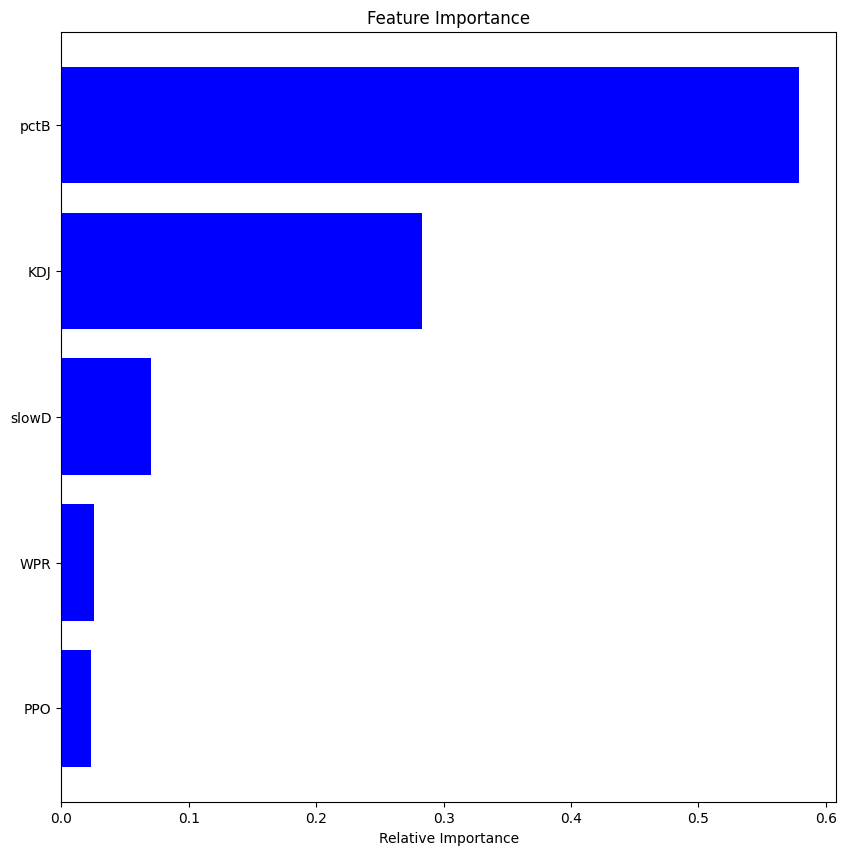

In [ ]:
plt.figure(figsize=(10,10))

features = X.columns
importance = search_fit.best_estimator_.feature_importances_
indices = np.argsort(importance)

num_features = 5

#plot feature importance
plt.barh(range(num_features), importance[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices [-num_features:]])

# labels
plt.xlabel('Relative Importance')
plt.title('Feature Importance')

### 9. Visualize the optimized tree and display tree rules.


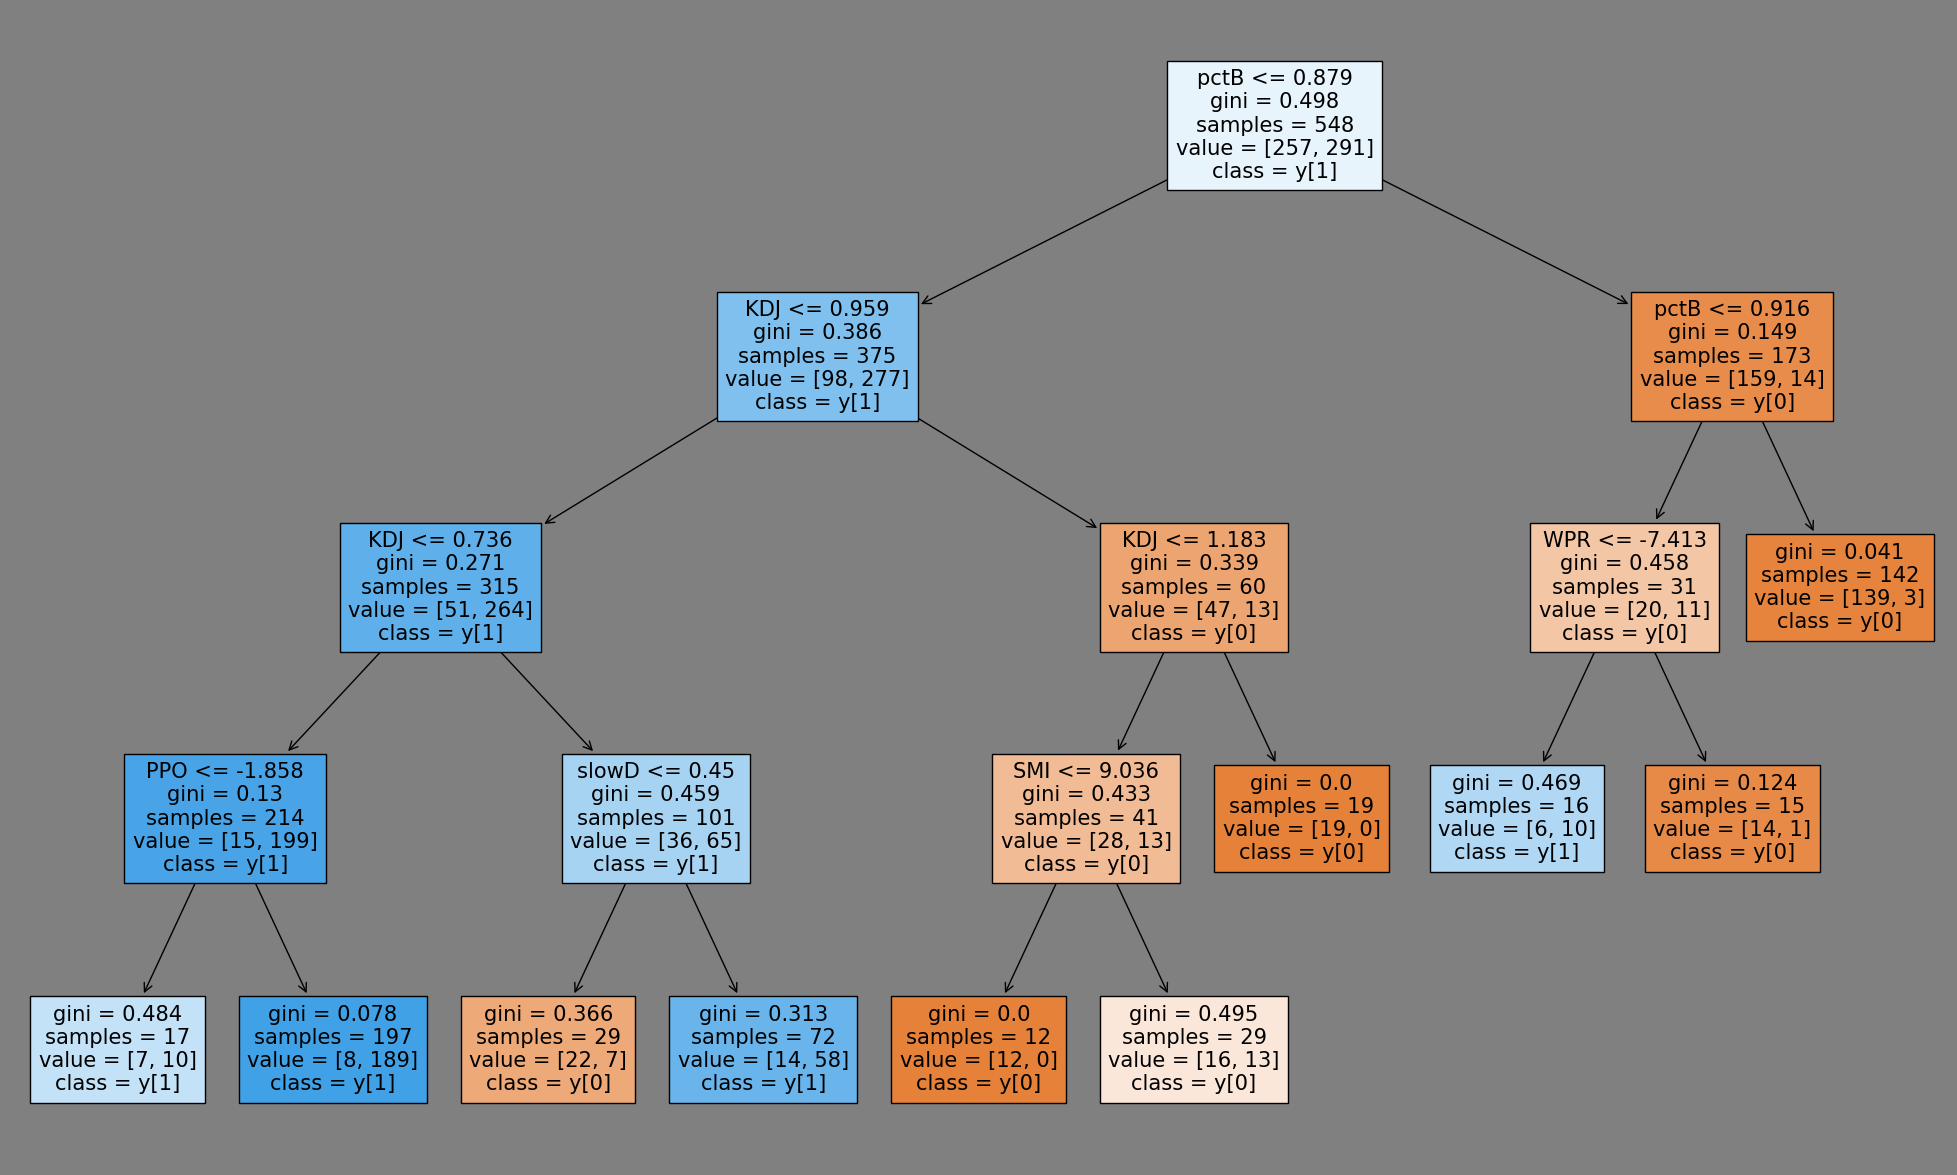

In [ ]:
fig, ax = plt.subplots(figsize=(25, 15), facecolor='gray')
tree.plot_tree(search_fit.best_estimator_, feature_names=X.columns, filled=True, class_names=True);

In [ ]:
from sklearn.tree import export_text

In [ ]:
tree_rules = export_text(search_fit.best_estimator_, feature_names=list(X))

In [ ]:
print(tree_rules)

|--- pctB <= 0.88
|   |--- KDJ <= 0.96
|   |   |--- KDJ <= 0.74
|   |   |   |--- PPO <= -1.86
|   |   |   |   |--- class: 1
|   |   |   |--- PPO >  -1.86
|   |   |   |   |--- class: 1
|   |   |--- KDJ >  0.74
|   |   |   |--- slowD <= 0.45
|   |   |   |   |--- class: 0
|   |   |   |--- slowD >  0.45
|   |   |   |   |--- class: 1
|   |--- KDJ >  0.96
|   |   |--- KDJ <= 1.18
|   |   |   |--- SMI <= 9.04
|   |   |   |   |--- class: 0
|   |   |   |--- SMI >  9.04
|   |   |   |   |--- class: 0
|   |   |--- KDJ >  1.18
|   |   |   |--- class: 0
|--- pctB >  0.88
|   |--- pctB <= 0.92
|   |   |--- WPR <= -7.41
|   |   |   |--- class: 1
|   |   |--- WPR >  -7.41
|   |   |   |--- class: 0
|   |--- pctB >  0.92
|   |   |--- class: 0



### 10. Summarize your findings and discuss your results.
- Is this model practical for predicting the outcome for buying stock?
- Which performance metrics were enahcned by using GridSearch?
- Describe the interesting and uninteresting information that these rules provides.

Compared to the baseline, this model is more accurate for predicting the outcome for buying stock. GridSearch enhanced the following metrics by their respective percentages:


1.   pctB importance = 57.93%
2.   KDJ importance = 28.29%
3.   slowD importance =  7.05%
4.   WPR importance =  2.59%
5.   PPO importance =  2.31%
6.   SMI importance =  1.83%

---

**pctB (Percent Below Close)**: percentage difference between the current closing stock price and the lowest price that the stock traded for during the day. This metric can be used as an indicator of how much downside risk there is in the stock's price.

**KDJ**: a tool used to identify momentum and potential buy or sell signals in a security's price

**slowD**: SlowD line is often used by traders and investors to identify potential buy or sell signals

**WPR (Williams Percent Range)**: indicator used to identify overbought or oversold conditions in a security's price

**PPO (Percentage Price Oscillator)**: measures momentum in a security's price

**SMI (Stochastic Momentum Index)**: Technical analysis indicator used to identify potential buy or sell signals in a security's price

---

Looking at the rules, PPO or SMI don't seem to affect the prediction. WPR affects it more than the other two. pctB and KDJ have the most influence. The larger the branch, the greater signifigance the metric has on the prediction. This is in line with the importance percentages.
